### Instructor Demo: Beta

This program reads in the daily closing prices of Amazon and the S&P 500 as CSVs and calculates the beta value of Amazon to represent the volatility of Amazon returns relative to the volatility of S&P 500 returns.

In [8]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt

### Read CSVs in as DataFrames

In [4]:
# Read the daily closing prices of AMZN, set the `date` as a datetime index
amzn_data = Path("../Resources/amzn_data.csv")
amzn_df = pd.read_csv(amzn_data, index_col="date", parse_dates=True, infer_datetime_format=True)

# Read the daily closing prices of S&P 500, set the `date` as a datetime index
sp500_data = Path("../Resources/sp500_data.csv")
sp500_df = pd.read_csv(sp500_data, index_col="date", parse_dates=True, infer_datetime_format=True)
sp500_df.head()

,close
date,
2014-05-20,1872.829956
2014-05-21,1888.030029
2014-05-22,1892.489990
2014-05-23,1900.530029
2014-05-27,1911.910034


### Combine DataFrames, Sort Index, and Rename Columns

In [5]:
# Create a new pivot table where the columns are the closing prices for each ticker
combined_df = pd.concat([fb_df, twtr_df, snap_df, sp500_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df.sort_index(inplace=True)

# Set column names to 'AMZN' and 'S&P 500'
combined_df.columns = ["AMZN", "S&P 500"]

# Display a few rows
combined_df.head()

,AMZN,S&P 500
date,,
2014-05-20,301.19,1872.829956
2014-05-21,305.01,1888.030029
2014-05-22,304.91,1892.489990
2014-05-23,312.24,1900.530029
2014-05-27,310.82,1911.910034


### Calculate Daily Returns

In [6]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
daily_returns = combined_df.pct_change()
daily_returns.head()

,AMZN,S&P 500
date,,
2014-05-20,NaN,NaN
2014-05-21,0.012683,0.008116
2014-05-22,-0.000328,0.002362
2014-05-23,0.024040,0.004248
2014-05-27,-0.004548,0.005988


In [9]:
daily_returns.dropna(inplace = True)
daily_returns.head()

,AMZN,S&P 500
date,,
2014-05-21,0.012683,0.008116
2014-05-22,-0.000328,0.002362
2014-05-23,0.024040,0.004248
2014-05-27,-0.004548,0.005988
2014-05-28,-0.002123,-0.001114


### Calculate Covariance of AMZN returns vs. S&P 500 returns
What is covariance?
- Covariance is a measure of the directional relationship between two variables. For example, the covariances between two financial assets such as stock returns would imply that both stock returns would move together with a positive covariance and move inversely with a negative covariance.
- A positive covariance means that both variables (both the S&P 500 and AMZN) tend to move together, in the same direction, at the same time.
- A negative covariance means that both variables (both the S&P 500 and AMZN) tend to move together, in the opposite direction, at the same time.

Covariance Measures 3 things:
1. A positive trend
2. A negative trend
3. No trend

In [10]:
# Calculate covariance of all daily returns of AMZN vs. S&P 500
covariance = daily_returns['AMZN'].cov(daily_returns['S&P 500'])
covariance

9.344294535060873e-05

### Calculate Variance of S&P 500 returns
"The term **variance** refers to a statistical measurement of the spread between numbers in a data set. More specifically, variance measures how far each number in the set is from the mean (average), and thus from every other number in the set. Variance is often depicted by this symbol: σ2. It is used by both analysts and traders to ***determine volatility*** and market security."
><a href="https://www.investopedia.com/terms/v/variance.asp">Investopedia: What Is Variance in Statistics? Definition, Formula, and Example<a/>

In [11]:
# Calculate variance of all daily returns of AMZN vs. S&P 500
variance = daily_returns['S&P 500'].var()
variance

7.030950113534627e-05

### Calculate Beta of AMZN
"Beta effectively describes the activity of a security's returns as it responds to swings in the market. A security's beta is calculated by dividing the product of the covariance of the security's returns and the market's returns by the variance of the market's returns over a specified period."
><a href="https://www.investopedia.com/terms/b/beta.asp">Investopedia: Beta: Definition, Calculation, and Explanation for Investors<a/>

In [12]:
# Calculate beta of all daily returns of AMZN
amzn_beta = covariance / variance
amzn_beta

1.3290230173974698

### Calculate 30-Day Rolling Covariance of AMZN Returns vs. S&P 500 Returns

<AxesSubplot:title={'center':'Rolling 30-Day Covariance of AMZN Returns vs. S&P 500 Returns'}, xlabel='date'>

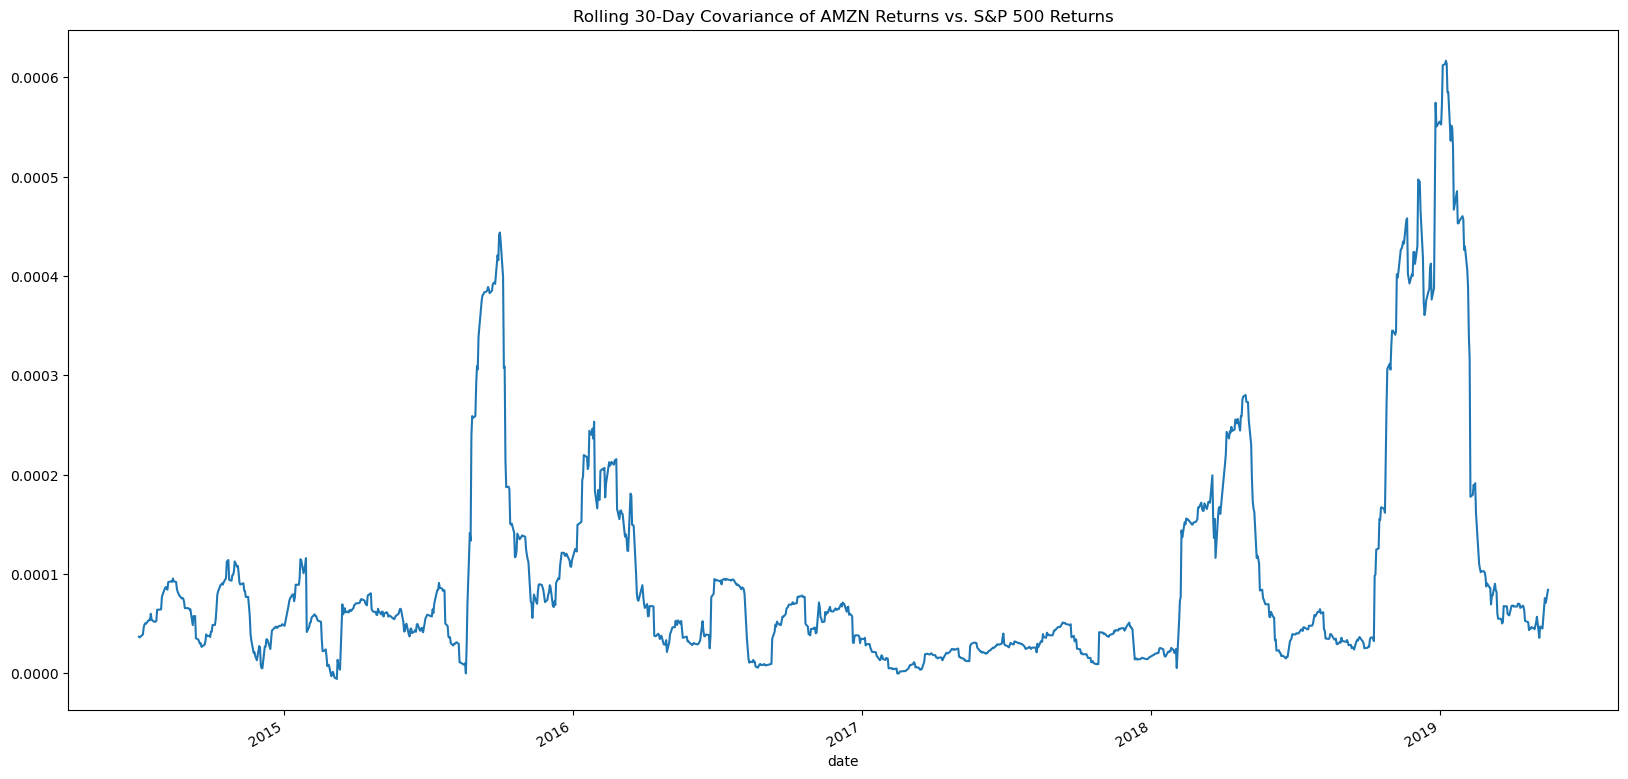

In [13]:
# Calculate 30-day rolling covariance of AMZN vs. S&P 500 and plot the data
rolling_covariance = daily_returns['AMZN'].rolling(window=30).cov(daily_returns['S&P 500'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of AMZN Returns vs. S&P 500 Returns')

### Calculate 30-Day Rolling Variance of S&P 500 Returns

<AxesSubplot:title={'center':'Rolling 30-Day Variance of S&P 500 Returns'}, xlabel='date'>

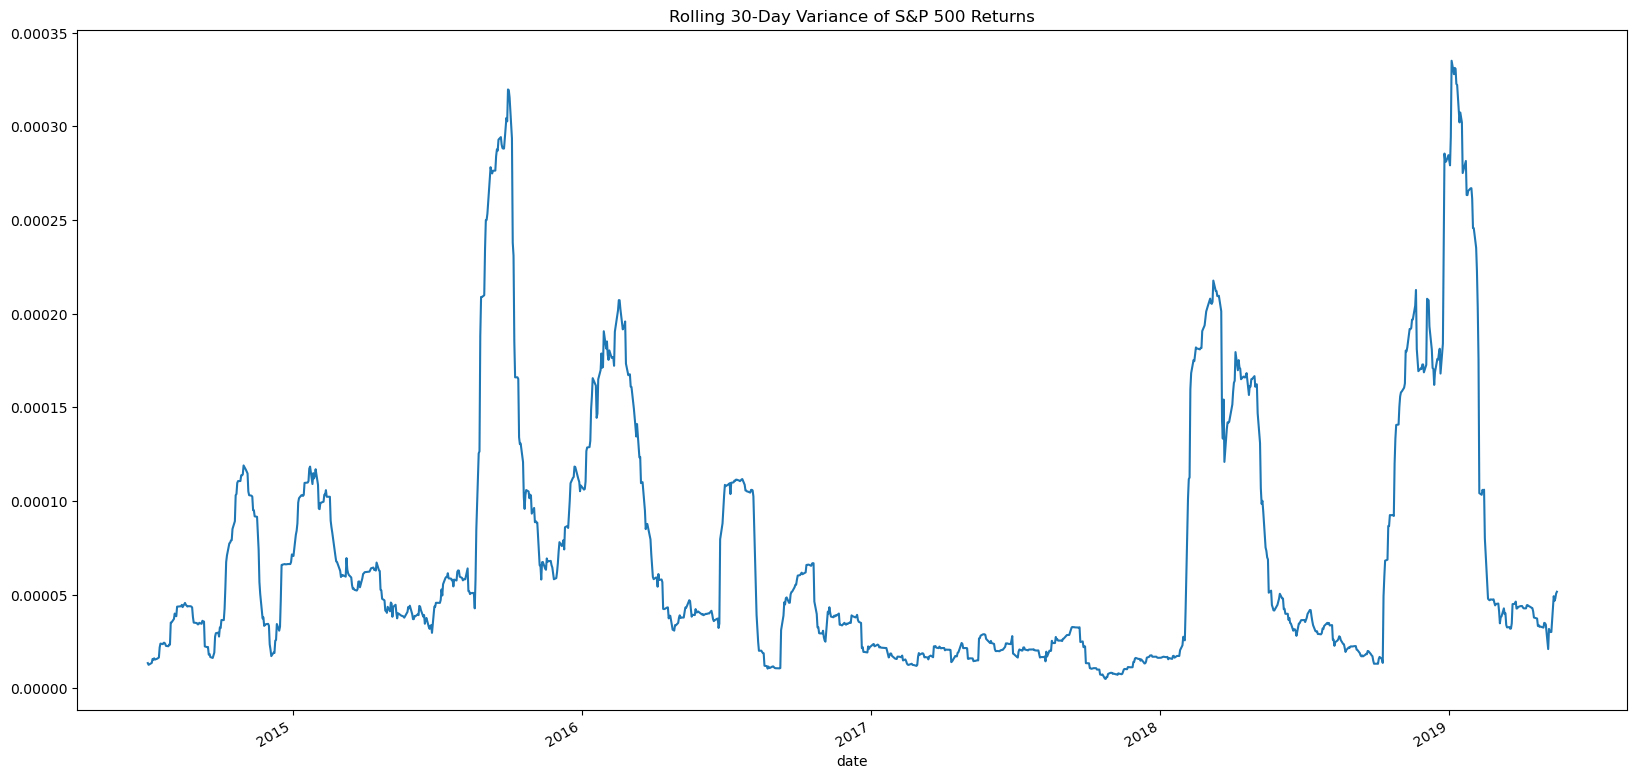

In [14]:
# Calculate 30-day rolling variance of AMZN vs. S&P 500 and plot the data
rolling_variance = daily_returns['S&P 500'].rolling(window=30).var()
rolling_variance.plot(figsize=(20, 10), title='Rolling 30-Day Variance of S&P 500 Returns')

date
2019-05-13    0.000049
2019-05-14    0.000047
2019-05-15    0.000048
2019-05-16    0.000051
2019-05-17    0.000052
Name: S&P 500, dtype: float64

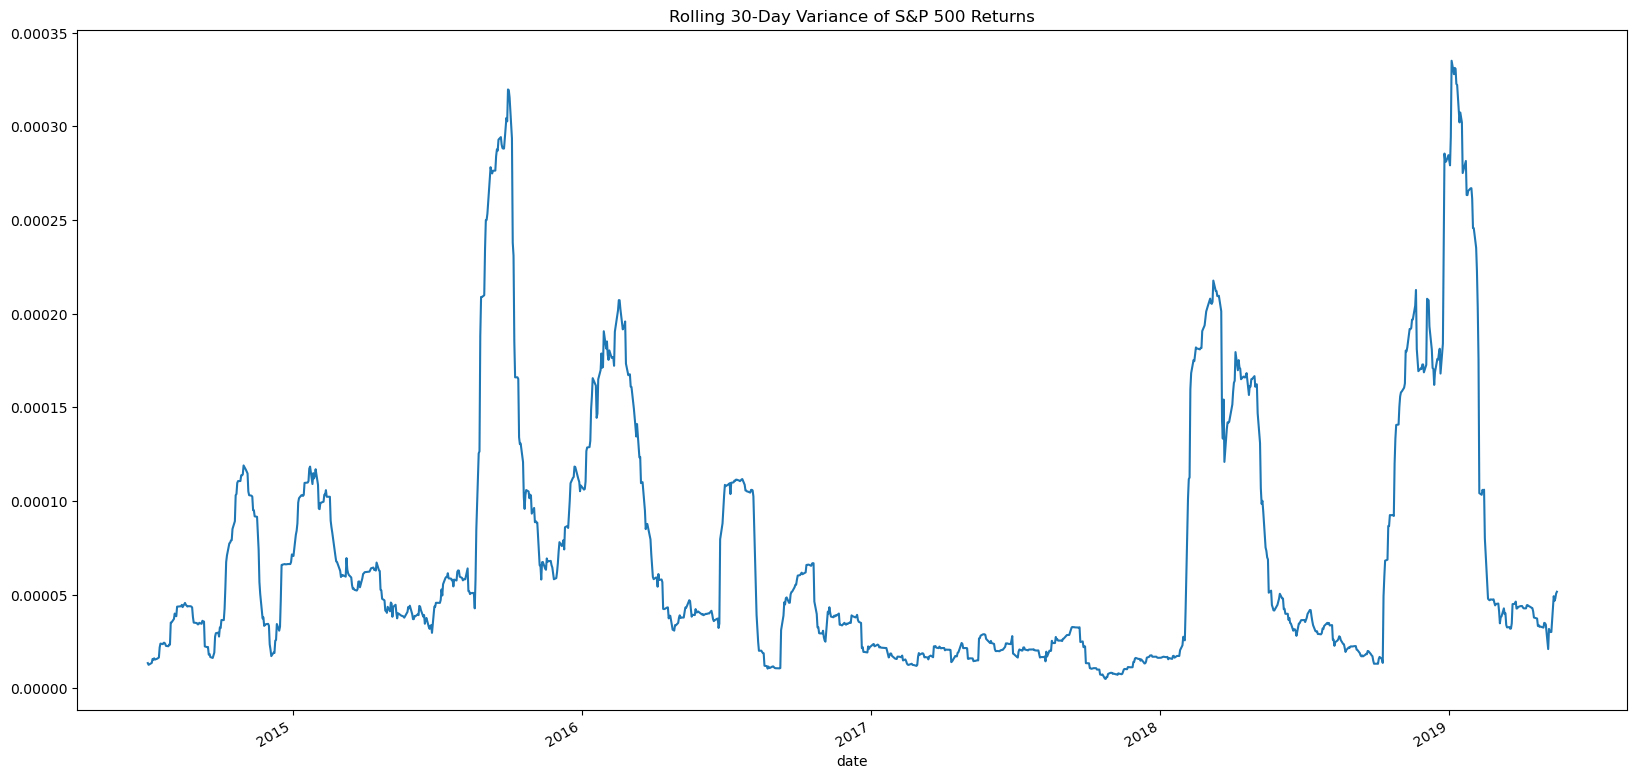

In [16]:
rolling_variance.plot(figsize=(20, 10), title='Rolling 30-Day Variance of S&P 500 Returns')
rolling_variance.tail(5)

### Calculate 30-Day Rolling Beta of AMZN

<AxesSubplot:title={'center':'Rolling 30-Day Beta of AMZN'}, xlabel='date'>

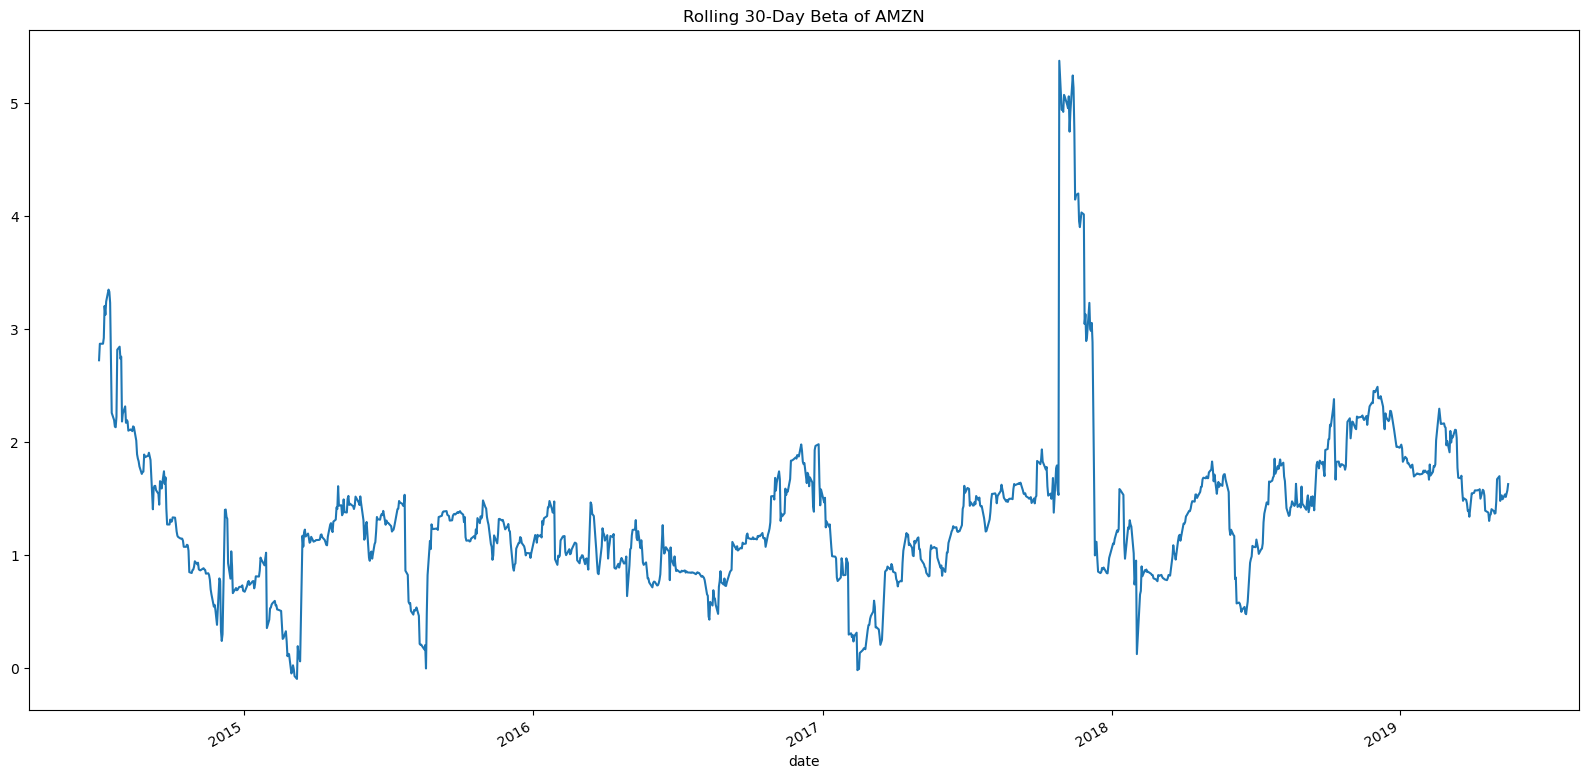

In [10]:
# Calculate 30-day rolling beta of AMZN and plot the data
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of AMZN')

### Beta vs. Correlation

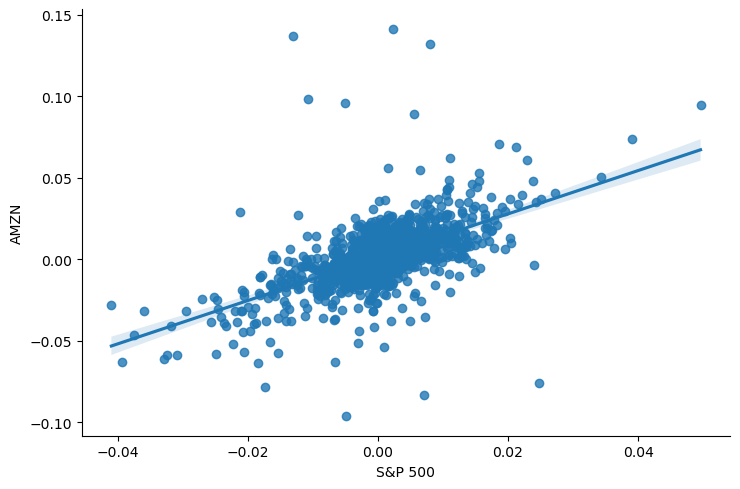

In [17]:
# Showcase beta vs. correlation by plotting a scatterplot using the Seaborn library and fitting a regression line
import seaborn as sns
sns.lmplot(x='S&P 500', y='AMZN', data=daily_returns, aspect=1.5, fit_reg=True)

In [21]:
amzn_beta


1.3290230173974698

In [22]:
daily_returns.corr(method="pearson")

,AMZN,S&P 500
AMZN,1.000000,0.585244
S&P 500,0.585244,1.000000


Note that the Beta value and the correlation do **not** match! Beta is a measure of volatity relative to the market. We would conclude that this stock is approximately 33% more volatile than the market (Beta of 1.329). The Pearson Correlation (which is R, not R-squared) is an indication of the extent of the linear relationship between AMZN and the S&P500. 

### BONUS: Create a calculation to find the Standard Deviation of a stock using variance.  Use the function to find the Standard Deviation of AMZN's returns.

In [7]:
# Standard Deviation is the Square Root of variance:
import math

In [8]:
# Create a method to calculate standard devation using variance
def std_of_returns(var):    
    return_std = math.sqrt(var)
    return return_std

In [9]:
# Find the Standard Deviation of AMZN's stock:
answer = std_of_returns(variance)
answer

3.7202150475476548